In [1]:
import pandas as pd
df=pd.read_csv("/Users/somesh-19583/Desktop/Health Care/playground-series-s4e11/Preprocessed_Data.csv")
df

,Gender,Age,Working Professional or Student,Work Pressure,Job Satisfaction,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Sleep_Category,city_encoded,profession_encoded,degree_encoded
0,0.0,42.0,1.0,5.000000,2.000000,1,1,12.0,5.0,1,1,1,10,11,7
1,0.0,30.0,0.0,3.182796,2.935484,2,0,4.0,1.0,0,0,3,24,0,14
2,1.0,21.0,1.0,3.000000,1.000000,0,1,3.0,5.0,0,1,2,17,26,15
3,0.0,59.0,1.0,5.000000,2.000000,1,1,6.0,1.0,0,0,1,24,7,16
4,0.0,35.0,1.0,5.000000,1.000000,1,0,3.0,4.0,1,0,2,11,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152077,1.0,21.0,0.0,3.751261,2.436975,0,1,11.0,5.0,0,1,2,2,2,0
152078,0.0,23.0,1.0,5.000000,2.000000,2,1,3.0,4.0,0,1,2,13,2,10
152079,1.0,36.0,1.0,4.000000,3.000000,1,1,10.0,5.0,0,1,1,12,21,20
152080,0.0,29.0,1.0,4.000000,1.000000,1,0,11.0,5.0,0,1,2,9,4,2


In [2]:
target_column = 'Depression'
X = df.drop(columns=[target_column])  # Features DataFrame
y = df[target_column]

In [3]:
len(X.columns)

14

                                  Feature  Importance
1                                     Age    0.379094
6   Have you ever had suicidal thoughts ?    0.104174
3                           Work Pressure    0.094837
4                        Job Satisfaction    0.070814
2         Working Professional or Student    0.065178
12                     profession_encoded    0.053073
7                        Work/Study Hours    0.048106
8                        Financial Stress    0.046884
11                           city_encoded    0.043325
13                         degree_encoded    0.039472
5                          Dietary Habits    0.021029
10                         Sleep_Category    0.015940
9        Family History of Mental Illness    0.009476
0                                  Gender    0.008599


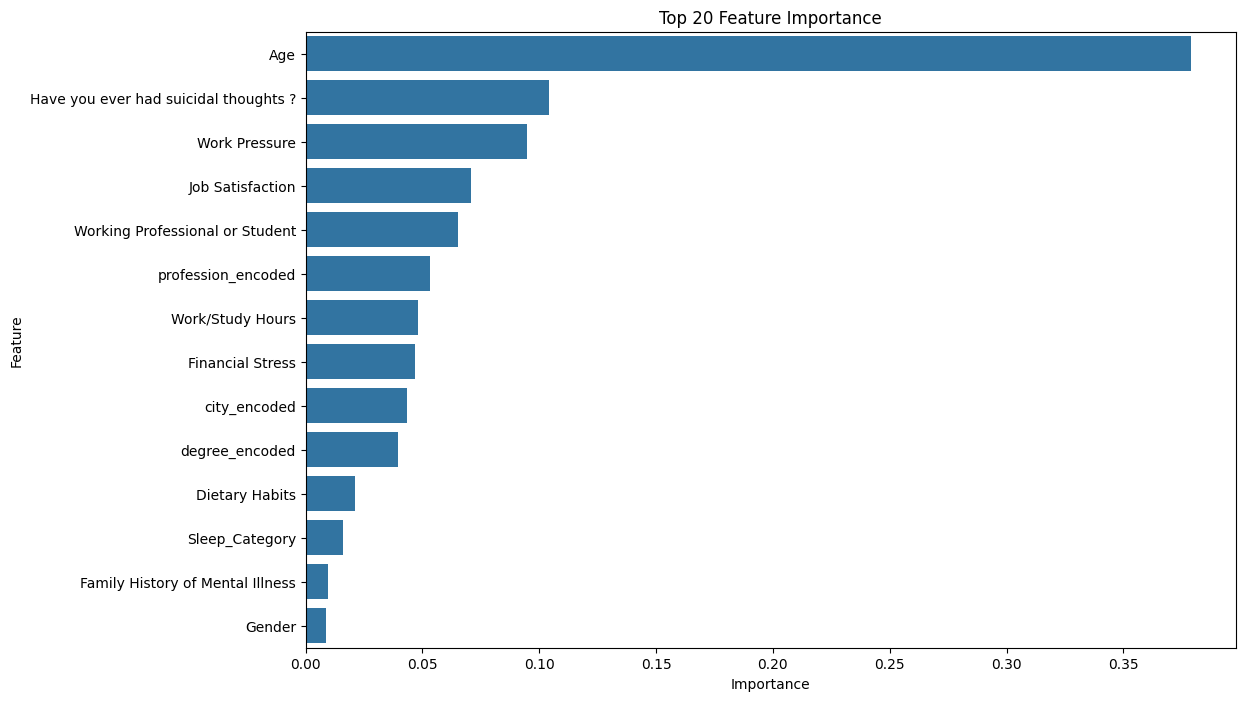

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns


# Assuming X (features) and y (target) are already separated

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the data
rf_model.fit(X, y)

# Get the feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
features_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the features by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Select the top 20 features
top_20_features = features_df.head(20)
print(top_20_features)
# Plot the top 20 feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=top_20_features)
plt.title('Top 20 Feature Importance')
plt.show()


In [5]:
print(X.dtypes)  # All should be int or float


Gender                                   float64
Age                                      float64
Working Professional or Student          float64
Work Pressure                            float64
Job Satisfaction                         float64
Dietary Habits                             int64
Have you ever had suicidal thoughts ?      int64
Work/Study Hours                         float64
Financial Stress                         float64
Family History of Mental Illness           int64
Sleep_Category                             int64
city_encoded                               int64
profession_encoded                         int64
degree_encoded                             int64
dtype: object


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pickle
import mlflow
import mlflow.pytorch
import os
import pandas as pd

from sklearn.base import BaseEstimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# === PyTorch MLP Model Definition ===
class DepressionClassifier(nn.Module):
    def __init__(self, input_size):
        super(DepressionClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(32, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.model(x)

# === PyTorch Classifier Wrapped for sklearn Pipeline ===
class PyTorchClassifier(BaseEstimator):
    def __init__(self, input_size, epochs=50, lr=0.001):
        self.input_size = input_size
        self.epochs = epochs
        self.lr = lr
        self.model = DepressionClassifier(input_size)

    def fit(self, X, y):
        self.model.train()
        X_tensor = torch.tensor(X, dtype=torch.float32)
        y_tensor = torch.tensor(y.values if hasattr(y, 'values') else y, dtype=torch.float32).unsqueeze(1)

        criterion = nn.BCELoss()
        optimizer = optim.Adam(self.model.parameters(), lr=self.lr)

        for epoch in range(self.epochs):
            optimizer.zero_grad()
            outputs = self.model(X_tensor)
            loss = criterion(outputs, y_tensor)
            loss.backward()
            optimizer.step()

        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(X_tensor)
            return (outputs > 0.5).float().numpy().flatten()

    def predict_proba(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X, dtype=torch.float32)
            outputs = self.model(X_tensor)
            return np.hstack([(1 - outputs.numpy()), outputs.numpy()])

# === Main Execution ===
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
    input_size = X_train.shape[1]

    # Pipeline
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('pytorch', PyTorchClassifier(input_size=input_size, epochs=50, lr=0.001))
    ])

    # MLflow Local Tracking
    mlruns_path = os.path.join(os.getcwd(), "mlruns")
    mlflow.set_tracking_uri(f"file://{mlruns_path}")
    mlflow.set_experiment("Depression_Detection_2")

    with mlflow.start_run():
        # Train the pipeline
        pipeline.fit(X_train, y_train)

        # Evaluate on test data
        y_pred = pipeline.predict(X_test)
        y_prob = pipeline.named_steps['pytorch'].predict_proba(
            pipeline.named_steps['scaler'].transform(X_test))[:, 1]

        # Metrics
        acc = accuracy_score(y_test, y_pred)
        prec = precision_score(y_test, y_pred)
        rec = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_prob)

        print("\n--- Evaluation Metrics ---")
        print(f"Accuracy : {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall   : {rec:.4f}")
        print(f"F1 Score : {f1:.4f}")
        print(f"ROC AUC  : {auc:.4f}")

        # Log metrics to MLflow
        mlflow.log_metric("accuracy", acc)
        mlflow.log_metric("precision", prec)
        mlflow.log_metric("recall", rec)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("roc_auc", auc)

        # Save artifacts
        pickle.dump(pipeline.named_steps['scaler'], open("scaler.pkl", "wb"))
        torch.save(pipeline.named_steps['pytorch'].model.state_dict(), "model.pt")

        # Log artifacts to MLflow
        mlflow.pytorch.log_model(pipeline.named_steps['pytorch'].model, artifact_path="pytorch_model")
        mlflow.log_artifact("scaler.pkl")
        mlflow.log_artifact("model.pt")


Epoch 1, Loss: 0.6496
Epoch 2, Loss: 0.5302
Epoch 3, Loss: 0.3311
Epoch 4, Loss: 0.1800
Epoch 5, Loss: 0.1103
Epoch 6, Loss: 0.0958
Epoch 7, Loss: 0.0949
Epoch 8, Loss: 0.0422
Epoch 9, Loss: 0.0682
Epoch 10, Loss: 0.0209
Epoch 11, Loss: 0.0275
Epoch 12, Loss: 0.0502
Epoch 13, Loss: 0.0171
Epoch 14, Loss: 0.0396
Epoch 15, Loss: 0.0458
Epoch 16, Loss: 0.0121
Epoch 17, Loss: 0.0146
Epoch 18, Loss: 0.0229
Epoch 19, Loss: 0.0052
Epoch 20, Loss: 0.0101


NameError: name 'test_loader' is not defined

In [ ]:
# Assuming 'X_train' is your training DataFrame after preprocessing
feature_names = X_train
print(feature_names)
# Save the feature names to a file
with open("feature_names.pkl", "wb") as f:
    pickle.dump(feature_names, f)
